Video is converted to single image

In [6]:
# 定义保存图片函数
# image:要保存的图片名字
# addr；图片地址与相片名字的前部分
# num: 相片，名字的后缀。int 类型
def save_image(image,path,num):
    img_path = path + str(num)+ '.jpg'
    cv2.imwrite(img_path,image)

In [8]:
# 导入所需要的库
import cv2
import numpy as np
# 读取视频文件
videoCapture = cv2.VideoCapture("DAVIS-2017-TrainVal.mp4")
#读帧
i = 1
while True:
    _, frame = videoCapture.read()
    if frame is None:
        break
    # 保存每一帧图片
    save_image(frame,'./output/image',i)
    i = i + 1
print('done!')

done!


Image convent to gif

In [11]:
from PIL import Image
import os 

In [29]:
base_path = './output'
imgs = []
img_list = os.listdir(base_path)
img_list.sort(key= lambda x:int(x[5:-4]))
# print(img_list)
for i, img in enumerate(img_list):
    if i==195:
        break
    img_path = base_path + '/' + img
    imgs.append(Image.open(img_path)) 
imgs[0].save('img_mask.gif', save_all=True, append_images=imgs, duration=0.1)
print('done!')

done!


采用opencv给图像加入矩形框并保存，图像大小不变

In [12]:
import cv2
import numpy as np

fname = r'D:\Code\Datasets\OTB100\Basketball\img\0010.jpg'
img = cv2.imread(fname)
rect_disp_colors = {1: (0, 255, 0), 2: (0, 0, 255), 3: (255, 0, 0),
                        4: (255, 255, 255), 5: (0, 0, 0), 6: (0, 255, 128),
                        7: (123, 123, 123), 8: (255, 128, 0), 9: (128, 0, 255)}

gt_state = [187,233,34,81] #[198,214,34,81] 
pos = [gt_state[0] + (gt_state[2] - 1)/2, gt_state[1] + (gt_state[3] - 1)/2]
target_sz = [gt_state[2], gt_state[3]]
# scale_factors = 1.15**np.arange(-1, 2)
scale_factors = [1.15      , 1.3225]

# multi_scales = []
# for s1 in scale_factors:
#     for s2 in scale_factors:
#         multi_scales.append([s1, s2])
# ms = np.array(multi_scales) 
# sample_scales = ms * target_sz

sample_scales = [s * np.array(target_sz) for s in scale_factors]

for i, s in enumerate(sample_scales,start=1):
#     print(i,s)
    tl = tuple(map(int,[pos[0] - (s[0]-1)/2 + 1, pos[1] - s[1]/2 + 1]))
    br = tuple(map(int,[tl[0]+s[0], tl[1]+s[1]]))
    col = rect_disp_colors[i]
    cv2.rectangle(img, tl, br, col, 2)

cv2.imwrite('0010_new_fast.jpg', img)

True

In [13]:
1.15**np.arange(-2, 3)

array([0.75614367, 0.86956522, 1.        , 1.15      , 1.3225    ])

True

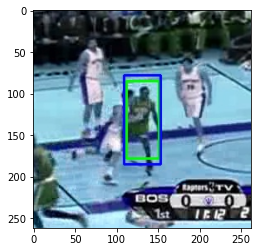

In [14]:
import matplotlib.pyplot as plt
# crop_size = [5*s for s in target_sz]
crop_size = int(np.sqrt(5**2*target_sz[0]*target_sz[1]))
im1 = cv2.imread('0010_new_fast.jpg')
# im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)

# print(im1.shape)
tl = tuple(map(int,[pos[0] - (crop_size - 1)/2, pos[1] - (crop_size - 1)/2]))
br = tuple(map(int,[tl[0]+crop_size, tl[1]+crop_size]))
im_crop = im1[tl[1]:br[1],tl[0]:br[0]]
# print(np.array(im_crop).shape)
plt.imshow(im_crop)
cv2.imwrite('test.jpg', im_crop)

reference image

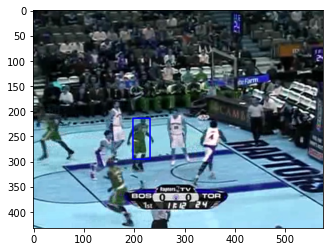

In [19]:
import cv2
import matplotlib.pyplot as plt
_tracker_disp_colors = {1: (0, 255, 0), 2:(255, 0, 0), 3:(0, 0, 255),
                        4: (255, 255, 255), 5: (0, 0, 0), 6: (255, 128, 0)
                        }
fname = r'D:\Code\Datasets\OTB100\Basketball\img\0001.jpg'
img2 = cv2.imread(fname)
gt_state = [198,214,34,81] 
cv2.rectangle(img2, (gt_state[0],gt_state[1]), (gt_state[0] + gt_state[2],gt_state[1] + gt_state[3]), _tracker_disp_colors[2], 2)
plt.imshow(img2)

True

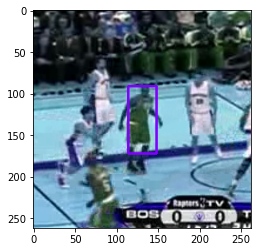

In [98]:


pos = [gt_state[0] + (gt_state[2] - 1)/2, gt_state[1] + (gt_state[3] - 1)/2]
# print(im1.shape)
tl = tuple(map(int,[pos[0] - (crop_size - 1)/2, pos[1] - (crop_size - 1)/2]))
br = tuple(map(int,[tl[0]+crop_size, tl[1]+crop_size]))
im_crop = img2[tl[1]:br[1],tl[0]:br[0]]

plt.imshow(im_crop)
cv2.imwrite('reference.jpg', im_crop)

散点图

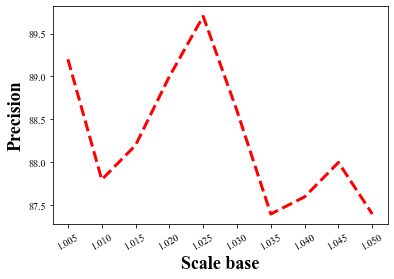

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# x_range = [i for i in np.arange(1.005,1.05,0.005)]
x_range = [1.005,1.010,1.015,1.020,1.025,1.030,1.035,1.040,1.045,1.050]
y_precision = [89.2,87.8,88.2,89.0,89.7,88.6,87.4,87.6,88.0,87.4]
# y_success = [60.5,60.5,59.8,60.6,60.2,60.3,58.9,58.4,59.2,58.0]
plt.plot(x_range,y_precision,color='red',linewidth=3.0,linestyle='--')
# plt.plot(x_range,y_success,color='blue',linewidth=3.0,linestyle='-.')
#用plot函数绘制折线图，线条颜色设置为绿色
# plt.title('precision plot',fontsize=24)

font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 18,
        }

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 14,
        }
#设置图表标题和标题字号
# plt.figure()
ax = plt.gca()
plt.tick_params(axis='both',which='major',labelsize=10)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
#设置刻度的字号
plt.xlabel('Scale base',font1)
#设置x轴标签及其字号
plt.ylabel('Precision',font1) #Precision Success
plt.xticks(np.arange(1.005,1.05,0.005),rotation = 30)
# 保存图片到本地

plt.savefig('Precision_success.png',dpi=300,bbox_inches='tight')
plt.show()


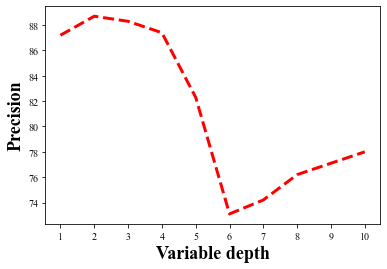

In [5]:
import matplotlib.pyplot as plt
import numpy as np

x_range = [i+1 for i in range(10)]
y_precision = [87.2,88.7,88.3,87.4,82.3,73.1,74.2,76.2,77.1,78.0]
# y_success = [63.0,63.7,62.0,60.4,55.2,48.2,49.7,49.7,50.8,52.0]
plt.plot(x_range,y_precision,color='red',linewidth=3.0,linestyle='--')
# plt.plot(x_range,y_success,color='blue',linewidth=3.0,linestyle='-.')
#用plot函数绘制折线图，线条颜色设置为绿色
# plt.title('precision plot',fontsize=24)

font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 18,
        }

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 14,
        }
#设置图表标题和标题字号
# plt.figure()
ax = plt.gca()
plt.tick_params(axis='both',which='major',labelsize=10)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
#设置刻度的字号
plt.xlabel('Variable depth',font1)
#设置x轴标签及其字号
plt.ylabel('Precision',font1) #Precision
plt.xticks(np.arange(1,11))
# 保存图片到本地

plt.savefig('scale_precision.png',dpi=300,bbox_inches='tight')
plt.show()


In [2]:
x_range = [i+1 for i in range(10)]

In [3]:
x_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [18]:
import cv2
import numpy as np

fname = r'D:\Code\Datasets\OTB100\Basketball\img\0010.jpg'
img = cv2.imread(fname)
rect_disp_colors = {1: (0, 255, 0), 2: (128, 0, 255), 3: (255, 0, 0),
                        4: (255, 128, 0), 5: (0, 0, 0), 6: (123, 123, 123),
                        7: (123, 123, 123), 8: (255, 128, 0), 9: (128, 0, 255)}

# gt_state = [187,233,34,81] #[198,214,34,81] 
# pos = [gt_state[0] + (gt_state[2] - 1)/2, gt_state[1] + (gt_state[3] - 1)/2]
# target_sz = [gt_state[2], gt_state[3]]
# scale_factors = 1.15**np.arange(-1, 2)
# scale_factors = [1.15      , 1.3225]

# pred_bb = [[187,233,34,81],[188,235,32,61],[189,225,33,79],[189,224,32,77],[188,221,33,89],[183,217,42,104]] # 10 Basketball default multiscale vat ratio var_ratio
pred_bb = [[187,233,34,81],[234,256,39,60],[237,244,37,89],[332,381,45,109],[217,236,49,85],[232,246,34,81]] # 70 Basketball


for i, s in enumerate(pred_bb,start=1):
#     print(i,s)
    pred_s = s
    tl = tuple(map(int,[pred_s[0], pred_s[1]]))
    br = tuple(map(int,[pred_s[0]+pred_s[2], pred_s[1]+pred_s[3]]))
    col = rect_disp_colors[i]
    cv2.rectangle(img, tl, br, col, 2)

cv2.imwrite('0070_basketball.jpg', img)

True

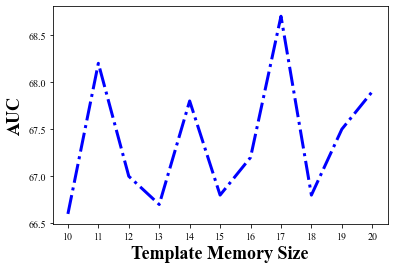

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# x_range = np.arange(5,22)
# y_precision= [88.2, 88.1, 88.2, 87.5, 87.0, 86.4, 89.0, 87.1, 87.1, 88.6, 86.9, 87.3, 88.1, 87.4, 88.3, 88.3, 88.5]
# y_success = [67.7, 67.5, 67.5, 67.3, 66.6,66.6, 68.2, 67.0, 66.7, 67.8, 66.8, 67.2, 67.5, 66.8, 67.5, 67.9, 67.7 ]

x_range = np.arange(10,21)
# y_precision= [86.4, 89.0, 87.1, 87.1, 88.6, 86.9, 87.3, 89.9, 87.4, 88.3,88.3]
y_success = [66.6, 68.2, 67.0, 66.7, 67.8, 66.8, 67.2, 68.7, 66.8, 67.5, 67.9]

# x_range = np.arange(5,16)
# y_precision= [88.2, 88.1, 88.2, 87.5, 87.0, 86.4, 89.0, 87.1, 87.1, 88.6, 86.9]
# y_success = [67.7, 67.5, 67.5, 67.3, 66.6,66.6, 68.2, 67.0, 66.7, 67.8, 66.8]
# plt.plot(x_range,y_precision,color='red',linewidth=3.0,linestyle='--')
plt.plot(x_range,y_success,color='blue',linewidth=3.0,linestyle='-.')
#用plot函数绘制折线图，线条颜色设置为绿色
# plt.title('precision plot',fontsize=24)

font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 18,
        }

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 14,
        }
#设置图表标题和标题字号
# plt.figure()
ax = plt.gca()
plt.tick_params(axis='both',which='major',labelsize=10)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
#设置刻度的字号
plt.xlabel('Template Memory Size',font1)
#设置x轴标签及其字号
plt.ylabel('AUC',font1) #Precision AUC
plt.xticks(x_range,rotation = 0)
# 保存图片到本地

plt.savefig('Precision_success.png',dpi=300,bbox_inches='tight')
plt.show()


In [4]:
import numpy as np
x_range = np.arange(5,22)
print(x_range)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


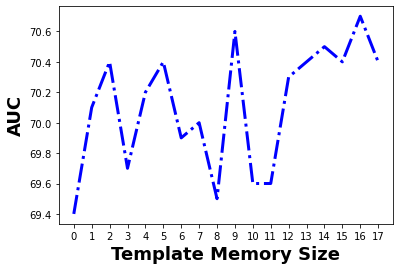

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# x_range = np.arange(5,22)
# y_precision= [88.2, 88.1, 88.2, 87.5, 87.0, 86.4, 89.0, 87.1, 87.1, 88.6, 86.9, 87.3, 88.1, 87.4, 88.3, 88.3, 88.5]
# y_success = [67.7, 67.5, 67.5, 67.3, 66.6,66.6, 68.2, 67.0, 66.7, 67.8, 66.8, 67.2, 67.5, 66.8, 67.5, 67.9, 67.7 ]

x_range = np.arange(0,18)
# y_precision= [86.4, 89.0, 87.1, 87.1, 88.6, 86.9, 87.3, 89.9, 87.4, 88.3,88.3]
y_success = [69.4,70.1,70.4,69.7,70.2,70.4,69.9,70.0,69.5,70.6,69.6,69.6,70.3,70.4,70.5,70.4,70.7,70.4] # OTB
# y_success = [64.5,65.6,66.5,63.8,64.8,64.1,64.8,64.9,64.3,63.6,64.3,63.7,65.2,64.3,63.5,64.8,64.5,64.4] # NFS

# x_range = np.arange(5,16)
# y_precision= [88.2, 88.1, 88.2, 87.5, 87.0, 86.4, 89.0, 87.1, 87.1, 88.6, 86.9]
# y_success = [67.7, 67.5, 67.5, 67.3, 66.6,66.6, 68.2, 67.0, 66.7, 67.8, 66.8]
# plt.plot(x_range,y_precision,color='red',linewidth=3.0,linestyle='--')
plt.plot(x_range,y_success,color='blue',linewidth=3.0,linestyle='-.')
#用plot函数绘制折线图，线条颜色设置为绿色
# plt.title('precision plot',fontsize=24)

font1 = {'family' : 'Times New Roman',
'weight' : 'bold',
'size'   : 18,
        }

font2 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 14,
        }
#设置图表标题和标题字号
# plt.figure()
ax = plt.gca()
plt.tick_params(axis='both',which='major',labelsize=10)
labels = ax.get_xticklabels() + ax.get_yticklabels()
[label.set_fontname('Times New Roman') for label in labels]
#设置刻度的字号
plt.xlabel('Template Memory Size',font1)
#设置x轴标签及其字号
plt.ylabel('AUC',font1) #Precision AUC
plt.xticks(x_range,rotation = 0)
# 保存图片到本地

plt.savefig('Precision_success.png',dpi=300,bbox_inches='tight')
plt.show()
